# MTH9879 Homework 6

Assigned: March 8, 2018.
Due March 22, 2018 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## Junliang Zhou

Tel: (347) 276-1207

Email: gjimzhou@gmail.com

### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Download RV estimator code

In [1]:
options(warn=-1)

library(repr)
options(repr.plot.width=10,repr.plot.height=7)

In [2]:
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2018/03/tq_BAC_C.zip", destfile="tq_BAC_C.zip")
unzip(zipfile="tq_BAC_C.zip")
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

In [3]:
load("tqDataBAC_20170919.rData")
Sys.setenv(TZ='EST')
tqBAC <- tqdata

In [4]:
library(highfrequency)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [5]:
source('RvEstimators.R')

### 1. (12 points) 
This assignment uses the *tqBAC* dataset and the RV estimators from *RvEstimators.R*.

(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

(b) Repeat part (a) for the BAC mid-quote series.

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

### Solution

(a)

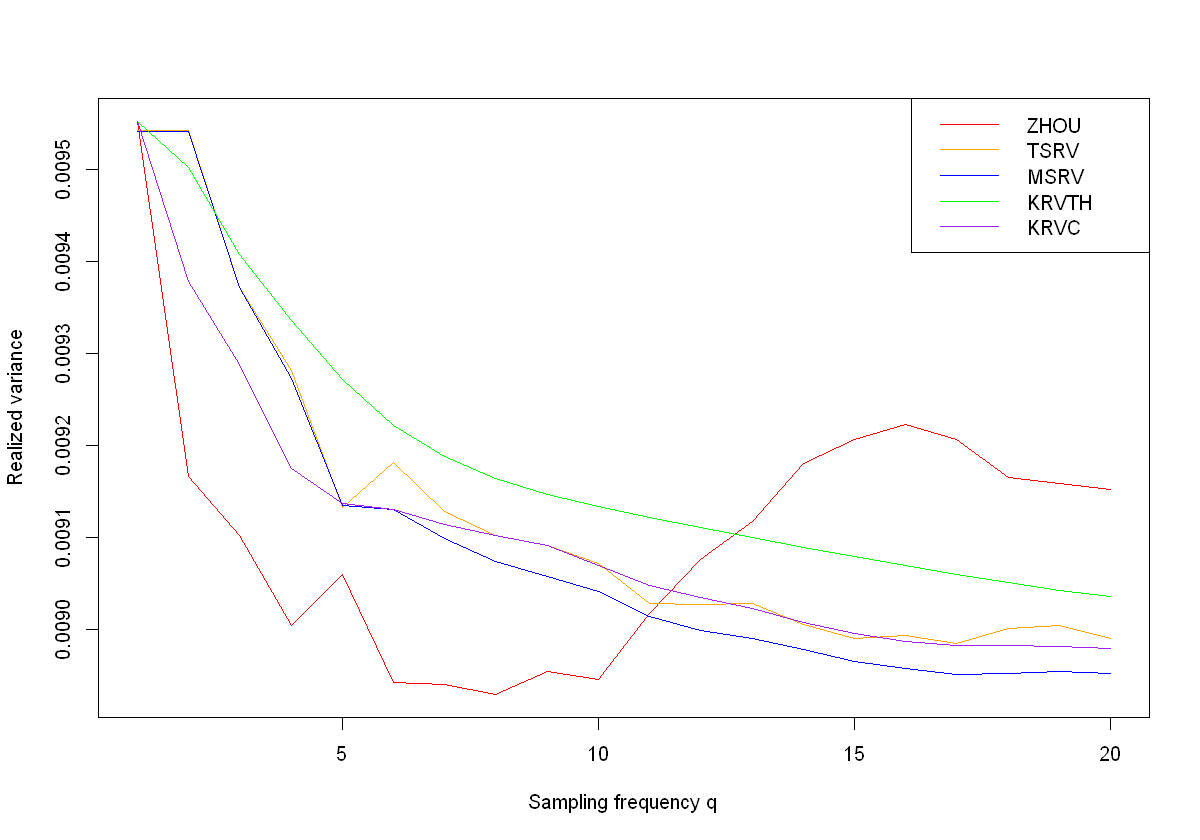

In [6]:
# Get stock prices
prices <- log(as.numeric(tqBAC$PRICE))

# Compute RV as function of sampling frequency
freq <- 20
rv_ZHOU <- sapply(1:freq, function(q){sqrt(ZHOU(prices,q))})
rv_TSRV <- sapply(1:freq, function(q){sqrt(TSRV(prices,q))})
rv_MS <- sapply(1:freq, function(q){sqrt(MSRV(prices,q))})
rv_KRVTH <- sapply(1:freq, function(q){sqrt(KRVTH(prices,q))})
rv_KRVC <- sapply(1:freq, function(q){sqrt(KRVC(prices,q))})

# Plot
plot(1:freq, rv_ZHOU, col="red", type='l', ylab='Realized variance', xlab='Sampling frequency q')
lines(rv_TSRV, col="orange")
lines(rv_MS, col="blue")
lines(rv_KRVTH, col="green")
lines(rv_KRVC, col="purple")
legend("topright", 
       c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),
       lty=c(1,1,1,1,1), 
       col=c("red","orange","blue","green","purple"))

(b)

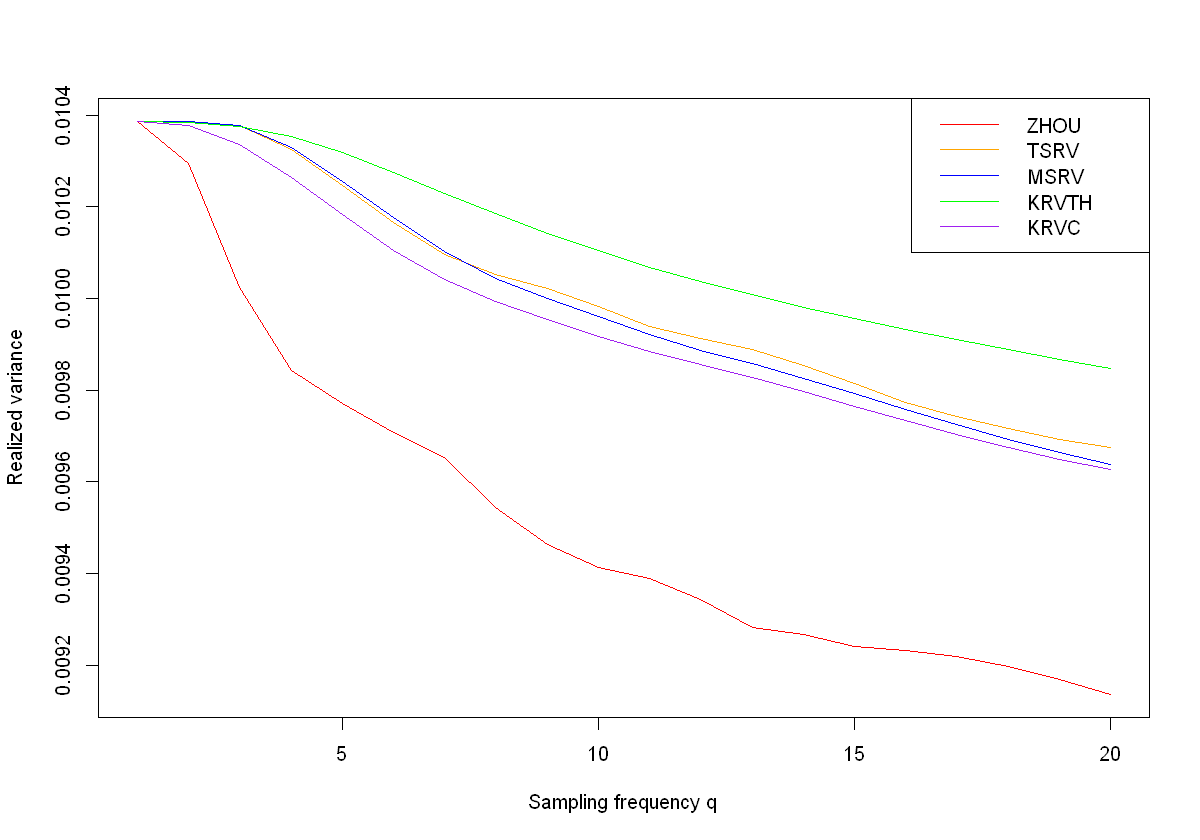

In [7]:
# Get mid quotes
mids <- log((as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2)

# Compute RV as function of sampling frequency
freq <- 20
rv_ZHOU <- sapply(1:freq, function(q){sqrt(ZHOU(mids,q))})
rv_TSRV <- sapply(1:freq, function(q){sqrt(TSRV(mids,q))})
rv_MS <- sapply(1:freq, function(q){sqrt(MSRV(mids,q))})
rv_KRVTH <- sapply(1:freq, function(q){sqrt(KRVTH(mids,q))})
rv_KRVC <- sapply(1:freq, function(q){sqrt(KRVC(mids,q))})

# Plot
plot(1:freq, rv_ZHOU, col="red", type='l', ylab='Realized variance', xlab='Sampling frequency q')
lines(rv_TSRV, col="orange")
lines(rv_MS, col="blue")
lines(rv_KRVTH, col="green")
lines(rv_KRVC, col="purple")
legend("topright", 
       c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),
       lty=c(1,1,1,1,1), 
       col=c("red","orange","blue","green","purple"))

(c)

As frequency from 1 to 20 doesn't give much useful information, replot with frequency from 1 to 200.

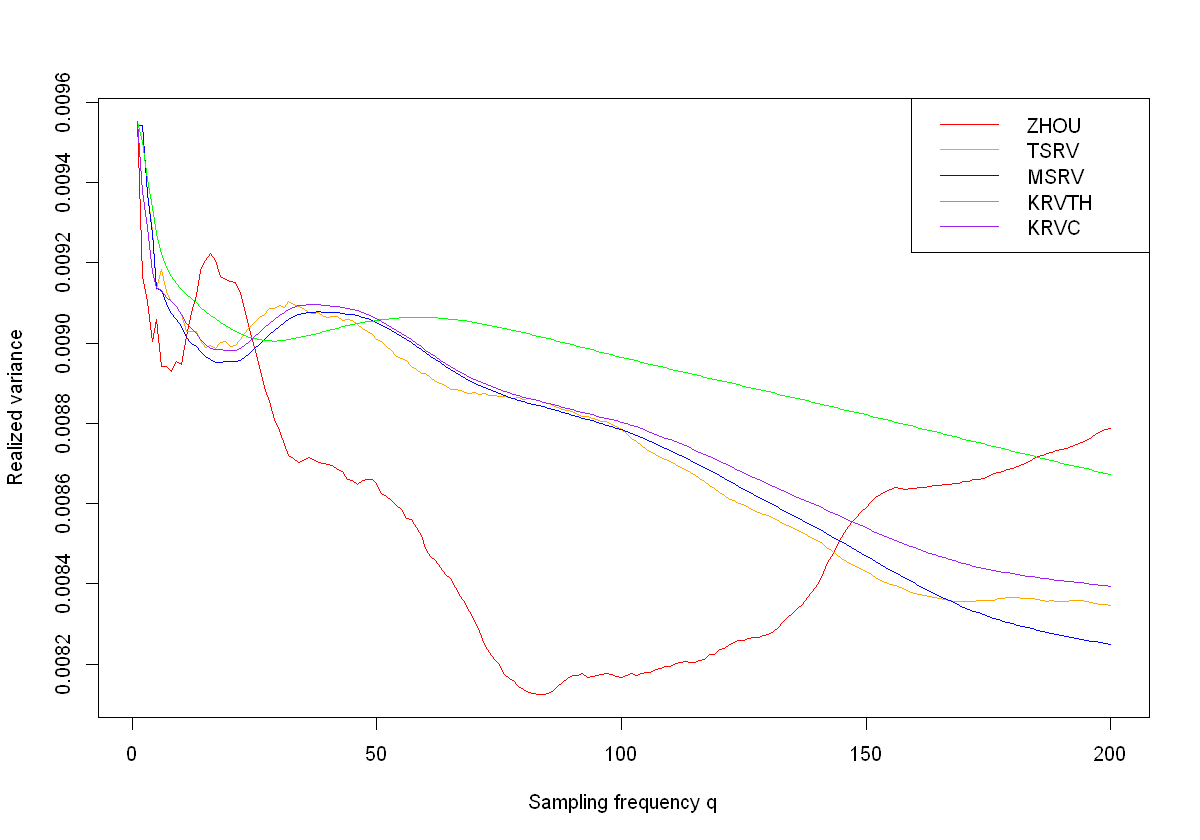

In [8]:
# Get stock prices
prices <- log(as.numeric(tqBAC$PRICE))

# Compute RV as function of sampling frequency
freq <- 200
rv_ZHOU <- sapply(1:freq, function(q){sqrt(ZHOU(prices,q))})
rv_TSRV <- sapply(1:freq, function(q){sqrt(TSRV(prices,q))})
rv_MS <- sapply(1:freq, function(q){sqrt(MSRV(prices,q))})
rv_KRVTH <- sapply(1:freq, function(q){sqrt(KRVTH(prices,q))})
rv_KRVC <- sapply(1:freq, function(q){sqrt(KRVC(prices,q))})

# Plot
plot(1:freq, rv_ZHOU, col="red", type='l', ylab='Realized variance', xlab='Sampling frequency q')
lines(rv_TSRV, col="orange")
lines(rv_MS, col="blue")
lines(rv_KRVTH, col="green")
lines(rv_KRVC, col="purple")
legend("topright", 
       c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),
       lty=c(1,1,1,1,1), 
       col=c("red","orange","blue","green","purple"))

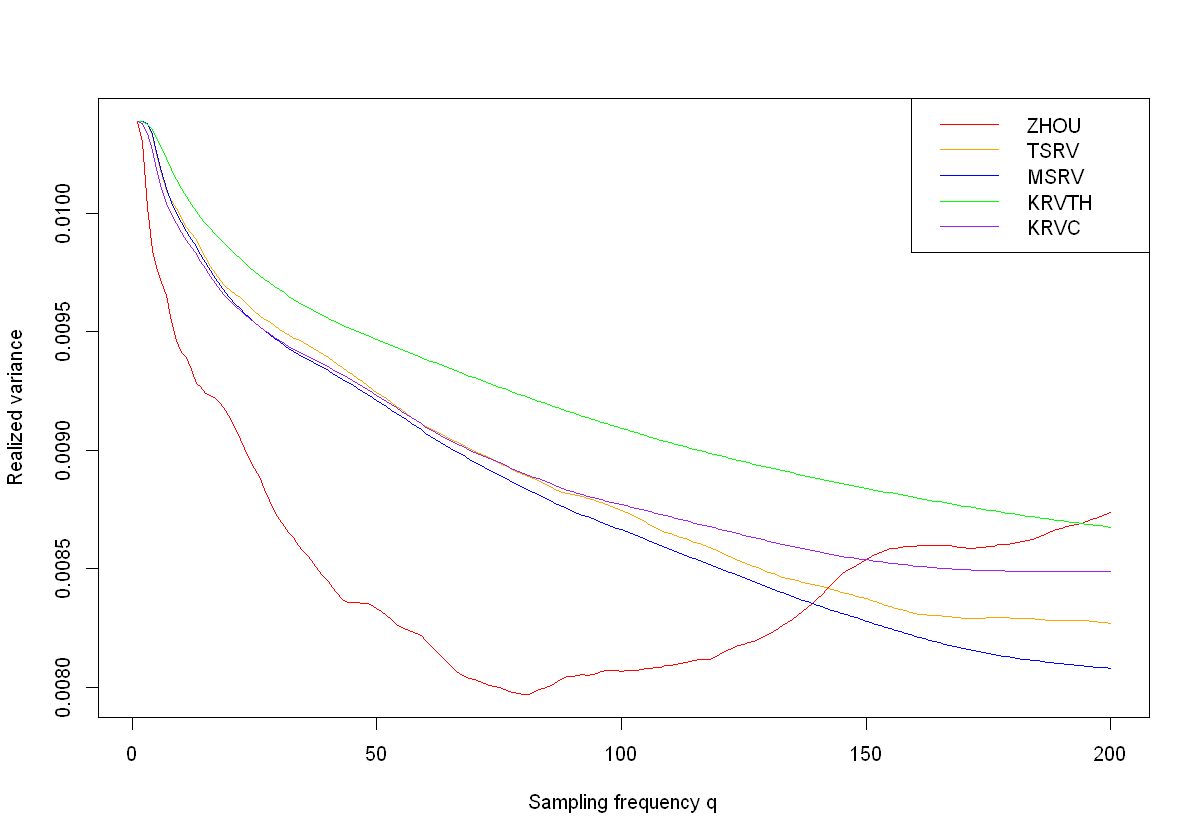

In [9]:
# Get mid quotes
mids <- log((as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2)

# Compute RV as function of sampling frequency
freq <- 200
rv_ZHOU <- sapply(1:freq, function(q){sqrt(ZHOU(mids,q))})
rv_TSRV <- sapply(1:freq, function(q){sqrt(TSRV(mids,q))})
rv_MS <- sapply(1:freq, function(q){sqrt(MSRV(mids,q))})
rv_KRVTH <- sapply(1:freq, function(q){sqrt(KRVTH(mids,q))})
rv_KRVC <- sapply(1:freq, function(q){sqrt(KRVC(mids,q))})

# Plot
plot(1:freq, rv_ZHOU, col="red", type='l', ylab='Realized variance', xlab='Sampling frequency q')
lines(rv_TSRV, col="orange")
lines(rv_MS, col="blue")
lines(rv_KRVTH, col="green")
lines(rv_KRVC, col="purple")
legend("topright", 
       c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),
       lty=c(1,1,1,1,1), 
       col=c("red","orange","blue","green","purple"))

From the plot we can choose KRVTH when frequency is 50 since it's the smoothest and most stable one among all estimators and frequencies.

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [10]:
load('tq.rData')
library(highfrequency)
library(quantmod)

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: 'quantmod'

The following objects are masked from 'package:highfrequency':

    getPrice, has.Qty



(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.

(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?

(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

### Solution

(a)

In [11]:
# Aggregate a tq object to the nearest k seconds
aggregateTQ <- function(tq, k) {
    return (aggregatets(tq, k=k, on="seconds"))
}

(b)

In [12]:
# Compute the correlation between two high-frequency log return series
corTQ <- function(tq1, tq2) {
    r1 <- diff(log(as.numeric(tq1$PRICE)))
    r2 <- diff(log(as.numeric(tq2$PRICE)))
    return (cor(r1, r2))
}

(c)

In [13]:
# Compute the correlation between aggregated log return series
aggCorTQ <- function(tq1, tq2, k) {
    atq1 <- aggregateTQ(tq1, k)
    atq2 <- aggregateTQ(tq2, k)
    return (corTQ(atq1, atq2))
}

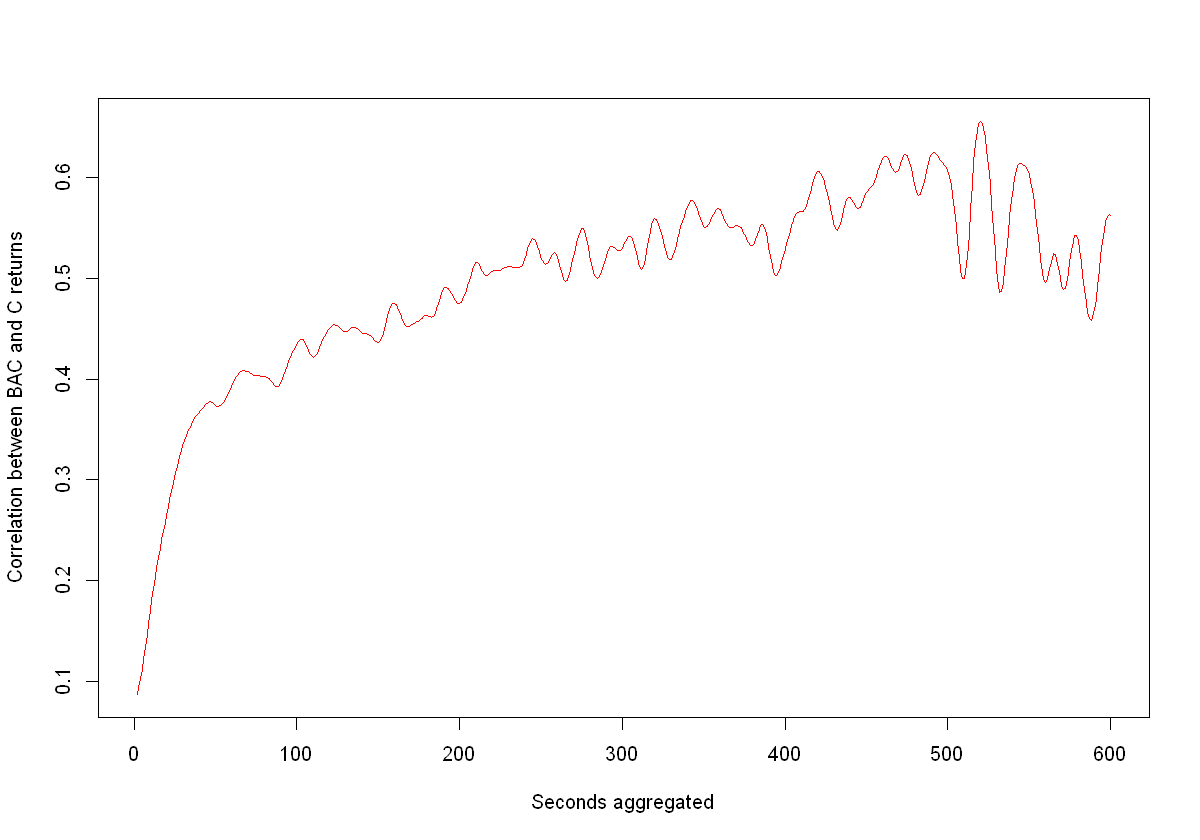

In [14]:
# Plot
x <- 2:600
plot(x, ksmooth(x, sapply(x, function(k){aggCorTQ(tqBAC,tqC,k)}), "normal", bandwidth=10)$y,
     col="red", type = "l", ylab="Correlation between BAC and C returns", xlab="Seconds aggregated")

(d)

From the plot we know that as the sampling frequency increases (aggregate second decreases), the correlation decreases, which is consistent with the Epps effect.

In [15]:
# Calculate correlation of 2-second return
aggCorTQ(tqBAC, tqC, 2)

[1] 0.04299153

The correlation of BAC and C according to their intraday 2-second returns, which is the mininum time period the `highfrequency` can provide, is 0.0429915308421487.

(e)

In [16]:
# Get symbols for BAC and C
getSymbols("BAC", src="yahoo", from="2012-01-01", to="2012-12-31")
getSymbols("C", src="yahoo", from="2012-01-01", to="2012-12-31")

# Calculate historical correlation of daily returns
rBAC <- diff(log(as.numeric(BAC$BAC.Adjusted)))
rC <- diff(log(as.numeric(C$C.Adjusted)))
cor(rBAC, rC)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "BAC"

[1] "C"

[1] 0.7996258

## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

### Solution

The Hayashi-Yoshida estimator is defined as

$$HY_t=\sum_{i\leq t}\sum_{j\leq t} {(p_i^{(1)}-p_{i-1}^{(1)})} {(p_j^{(2)}-p_{j-1}^{(2)})} \nu_{ij}$$

If two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, for all $p_i^{(1)}$ at $t_i$, there exists $p_i^{(2)}$ at $t_i$, and *vice versa*. Therefore, $\nu_{ij}=1$ for all $i=j\leq t$, and $\nu_{ij}=0$ otherwise.

Then the Hayashi-Yoshida estimator can be rewritten as

$$
HY_t=\sum_{i=j\leq t} {(p_i^{(1)}-p_{i-1}^{(1)})} {(p_j^{(2)}-p_{j-1}^{(2)})}=\sum_{i\leq t} \Delta p_i^{(1)} \Delta p_i^{(2)} $$

which is coincide with the realized covariance estimator.

## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [17]:
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [18]:
data.frame(head(spx.krv))

,head.spx.krv.
2000-01-03,0.0001607266
2000-01-04,0.0002643965
2000-01-05,0.0003046503
2000-01-06,0.0001485821
2000-01-07,0.000123267
2000-01-10,0.0001306934


### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.


### Solution

(a)


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16


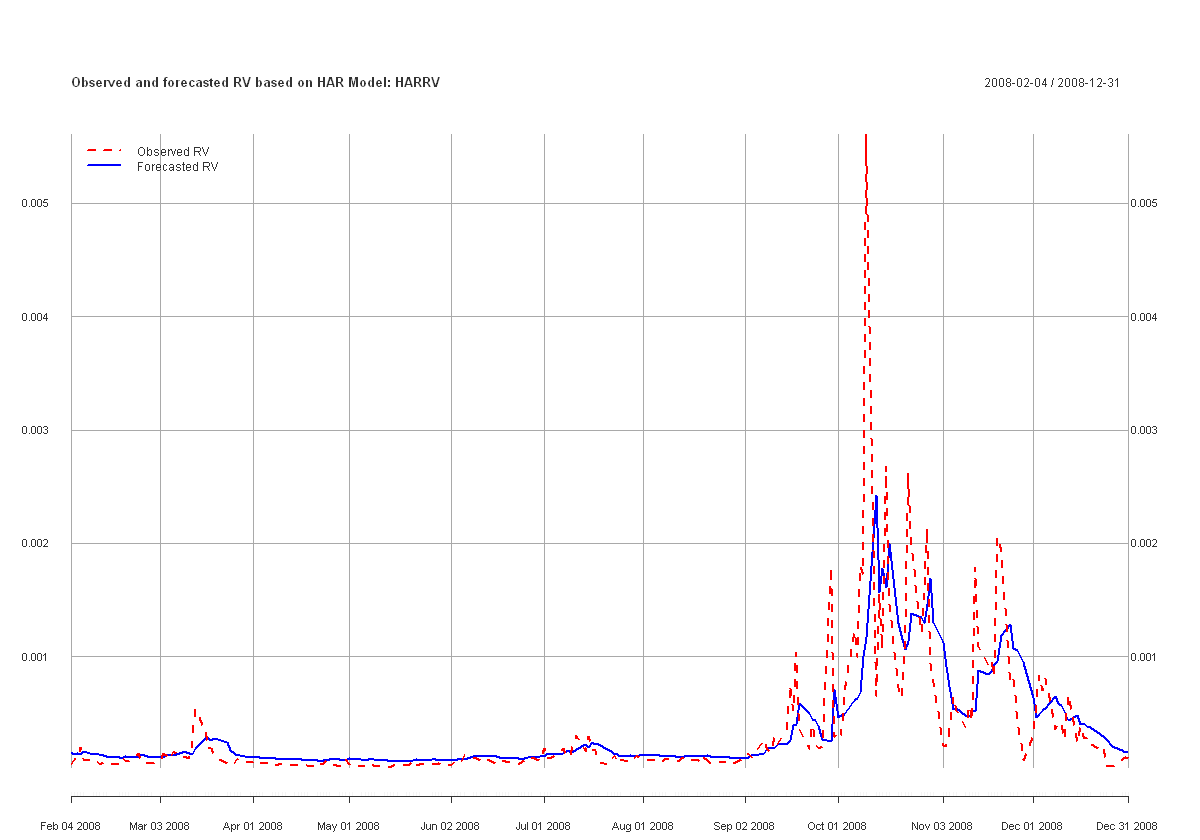

In [19]:
# Get DJI RV and run HAR-RV
data(realized_library)
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance
DJI_RV <- DJI_RV[!is.na(DJI_RV)]
DJI_RV <- DJI_RV['2008']

fit <- harModel(data=DJI_RV, periods=c(1,5,22), RVest=c("rCov"), type="HARRV", h=1, transform=NULL)
summary(fit)
plot(fit)

(b)


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0022396 -0.0001219 -0.0000725 -0.0000176  0.0079141 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 7.164e-05  5.960e-05   1.202  0.23067    
beta1 1.523e-01  8.218e-02   1.853  0.06526 .  
beta2 5.512e-01  1.415e-01   3.896  0.00013 ***
beta3 1.501e-01  1.324e-01   1.134  0.25801    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0006787 on 220 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4015 
F-statistic: 50.87 on 3 and 220 DF,  p-value: < 2.2e-16


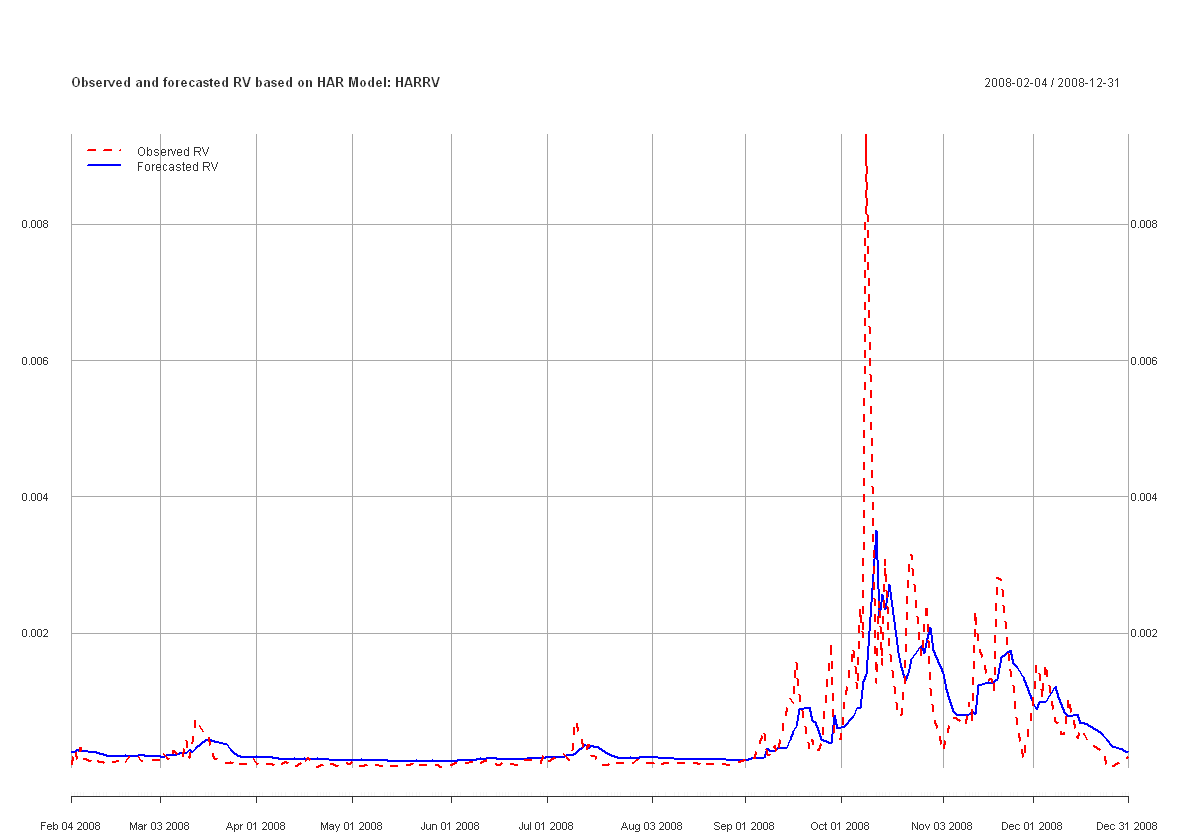

In [20]:
# Get SPX RV and run HAR-RV
spx.krv <- spx.krv[!is.na(spx.krv)]
spx.krv <- spx.krv['2008']

fit <- harModel(data=spx.krv, periods=c(1,5,22), RVest=c("rCov"), type="HARRV", h=1, transform=NULL)
summary(fit)
plot(fit)

(c)

The HAR-RV coefficients for DJI RV and SYX RV in 2008 are tabled below.

|  Estimator  |  DJI RV  |  SYX RV  |
|:------------|:---------|:---------|
|  Intercept  |  4.432e-05  |  7.164e-05  |
|  1-Day RV  |  1.586e-01 . |  1.523e-01 .  |
|  5-Day RV  |  6.213e-01 \*\*\*  |  5.512e-01 \*\*\*  |
|  22-Day RV  |  8.721e-02  |  1.501e-01  |

From the table we know that they are very much similar to each other and the 5-Day RV is the most significant for both.

(d)

[1] "VIX"

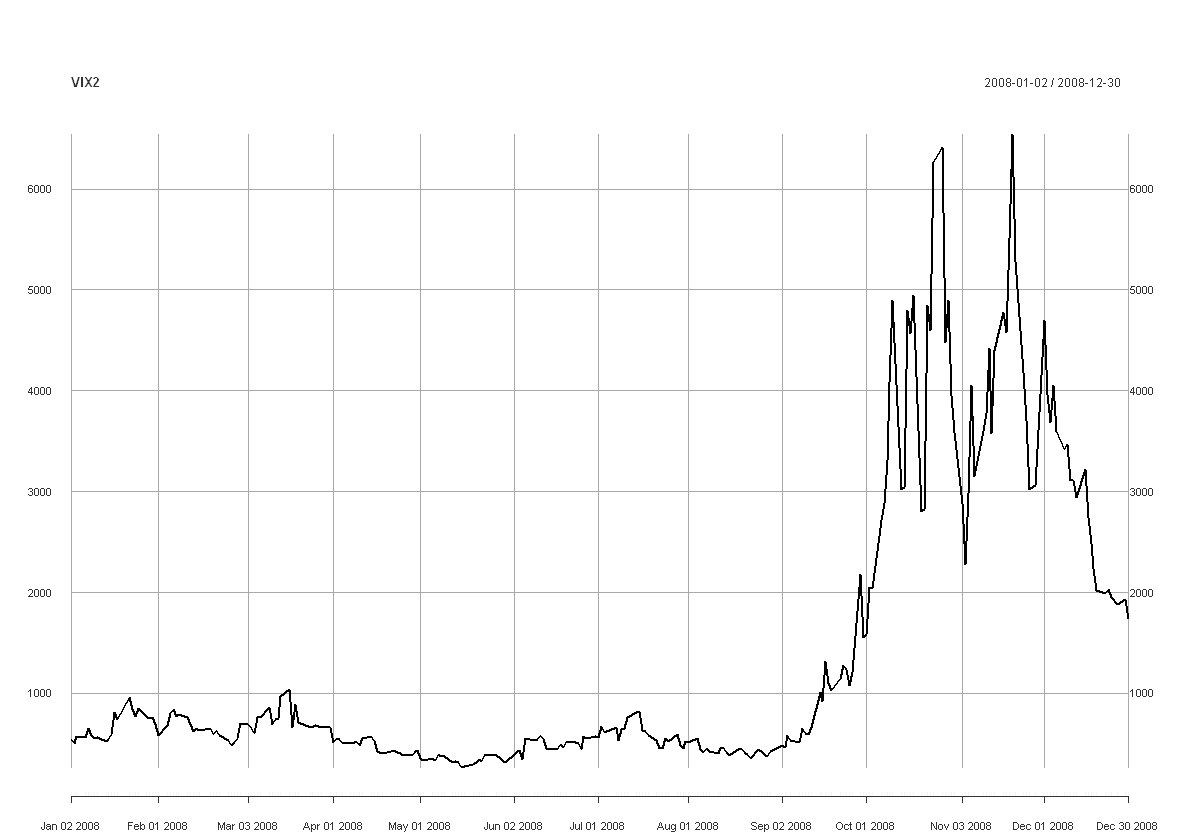

In [21]:
# Get VIX and calculate VIX^2
getSymbols("^VIX", src="yahoo", from="2008-01-01", to="2008-12-31")

VIX2 <- (VIX$VIX.Adjusted)^2
plot(VIX2, ylab="VIX^2", xlab="Date")

(e)

In [22]:
# Merge SPX, DJI, and VIX^2 by date
spx.krv <- data.frame(Date=as.Date(rownames(as.data.frame(spx.krv))), spx.krv)
DJI_RV <- data.frame(Date=as.Date(rownames(as.data.frame(DJI_RV))), DJI_RV)
VIX2 <- data.frame(Date=as.Date(rownames(as.data.frame(VIX2))), VIX2)

RVs <- merge(spx.krv, DJI_RV, by='Date')
RVs <- merge(RVs, VIX2, by='Date')
head(RVs)

,Date,spx.krv,Dow.Jones.Industrials.Realized.Variance,VIX.Adjusted
1,1.388000e+04,1.119915e-04,9.071620e-05,5.368489e+02
2,1.388100e+04,5.201828e-05,4.049200e-05,5.058001e+02
3,1.388200e+04,1.381456e-04,7.245940e-05,5.731236e+02
4,1.388500e+04,1.970979e-04,1.043010e-04,5.659641e+02
5,1.388600e+04,1.980179e-04,1.022930e-04,6.466849e+02
6,1.388700e+04,2.397865e-04,1.334460e-04,5.817744e+02


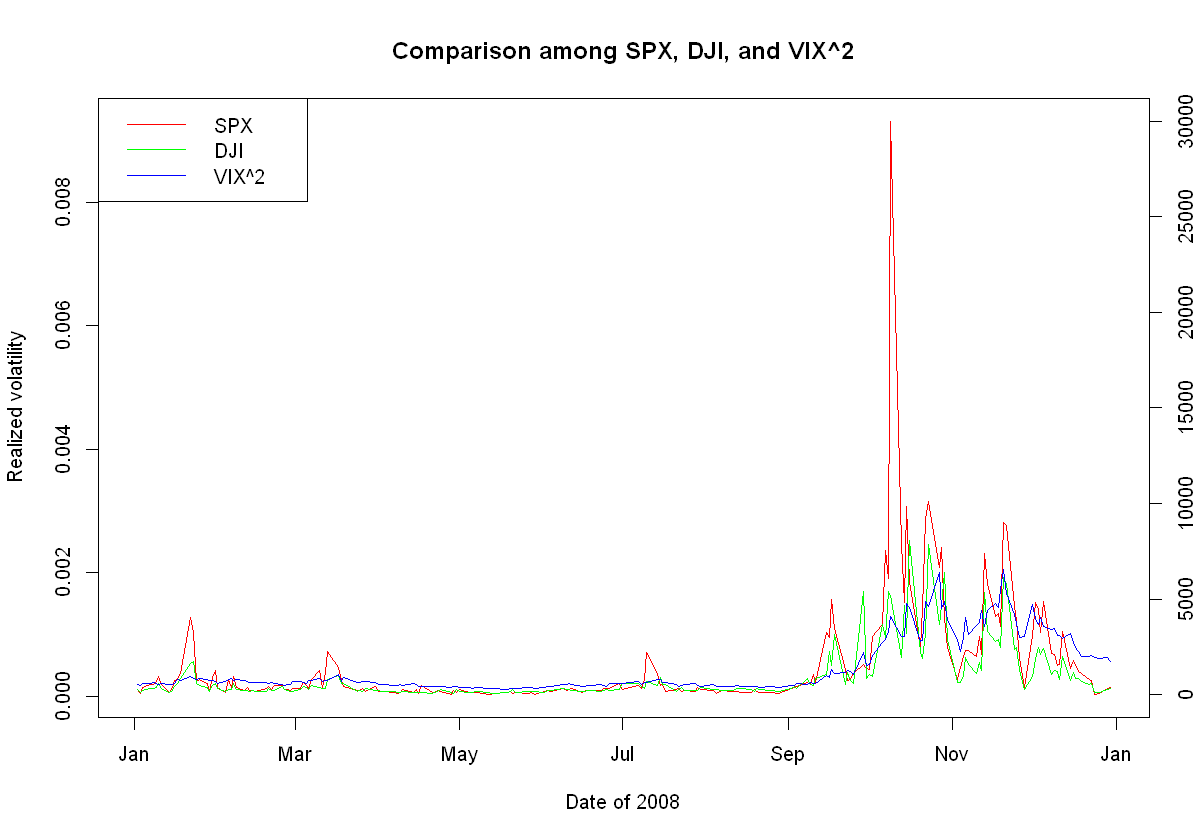

In [23]:
# Superimpose all three in one plot
plot(RVs$Date, RVs$spx.krv, col="red", type="l", 
     main="Comparison among SPX, DJI, and VIX^2", ylab="Realized volatility", xlab="Date of 2008")
par(new=T)
plot(RVs$Date, RVs$Dow.Jones.Industrials.Realized.Variance, col="green", type="l", ylim=c(0,0.01), 
     axes=F, main=NA, ylab=NA, xlab=NA)
par(new=T)
plot(RVs$Date, RVs$VIX.Adjusted, col="blue", type="l", ylim=c(0,30000),
     axes=F, main=NA, xlab=NA, ylab=NA)

# Additional axis on the right for VIX^2
axis(side=4)
mtext(side=4, line=3, "VIX Squared")
legend("topleft",
       legend=c("SPX","DJI","VIX^2"),
       lty=c(1,1,1,1,1),
       col=c("red","green","blue"))

From the plot we can see that the three realized variance estimators are highly correlated while the DJI is much more volatile than the other two.